<a href="https://colab.research.google.com/github/dandamudi-geeta/Quantum-Computing/blob/main/2348512_QC(Lab6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.2 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.3 MB/s eta 0:00:00


In [5]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=03ffae7d0fb3d913501d4386810ef7c8a95337c368789dc60665e9357f323322
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [6]:
import pylatexenc
import matplotlib.pyplot as plt

In [7]:
from qiskit_aer import Aer
from qiskit_aer import AerSimulator

In [8]:
from qiskit import QuantumCircuit,transpile
from qiskit.circuit.library import XGate, ZGate
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import random

In [9]:
# Create a 3-qubit quantum circuit
# q[0] is the random bit generator
# q[1] is Alice's qubit (for superdense coding)
# q[2] is Bob's qubit (for superdense coding)
qc = QuantumCircuit(3, 2)


In [10]:
# Randomly generate bits c and d (the classical message)
c = random.randint(0, 1)
d = random.randint(0, 1)
print(f"Random bits generated: c = {c}, d = {d}")

Random bits generated: c = 0, d = 1


In [11]:
# Step 1: Create a Bell state between q1 and q2
qc.h(1)
qc.cx(1, 2)

In [12]:
# Step 2: Encode the bits c and d on Alice's qubit (q1)
if d == 1:
    qc.x(1)  # Apply X gate if d is 1
if c == 1:
    qc.z(1)  # Apply Z gate if c is 1


In [13]:
# Step 3: Alice sends her qubit to Bob
# (In simulation, this is implicit since we are not physically sending qubits)

# Step 4: Bob decodes the message by applying CNOT and Hadamard
qc.cx(1, 2)
qc.h(1)

In [14]:
# Step 5: Measure the qubits to obtain the classical bits
qc.measure(1, 0)  # Alice's qubit (q1) corresponds to c
qc.measure(2, 1)  # Bob's qubit (q2) corresponds to d

In [15]:
import pylatexenc
print(pylatexenc.__version__)


2.10


Superdense Coding Circuit:


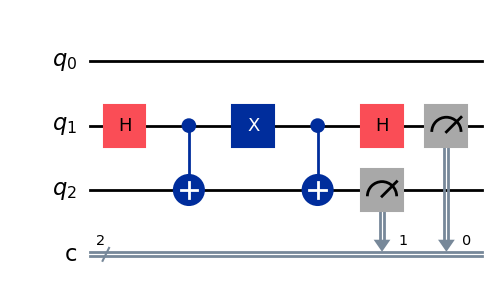

In [16]:
# Display the circuit
print("Superdense Coding Circuit:")
display(qc.draw(output='mpl'))

In [17]:
# Set up the simulator
simulator = AerSimulator()

In [18]:
# Transpile the circuit for the simulator
qc_transpiled = transpile(qc, simulator)

In [19]:
# Run the simulation
job = simulator.run(qc_transpiled, shots=1024)
result = job.result()

In [20]:
# Get and plot the result counts
counts = result.get_counts()
print("Measurement Results:")
print(counts)
plot_histogram(counts)
plt.show()

Measurement Results:
{'10': 1024}


In [21]:
# Check if the measurement matches the random bits generated (c, d)
correct_transmission = counts.get(f'{c}{d}', 0) > 0
print(f"Transmission successful: {correct_transmission}")

Transmission successful: False


**Explanation of the Code:
Random Bit Generation:**


*   We use Python's random.randint(0, 1) to generate two random bits, c and d,representing the message Alice wants to send.
Creating Entanglement:


*   A Hadamard gate on q[1] followed by a CNOT gate between q[1] and q[2] creates an entangled pair (Bell state) shared between Alice and Bob.
Encoding the Message:

*  Based on the values of c and d:
Apply an X gate on q[1] if d = 1.
Apply a Z gate on q[1] if c = 1.
These gates encode the two classical bits c and d onto the quantum state.
Decoding:

*  Bob applies a CNOT (with q[1] as control and q[2] as target) followed by a Hadamard gate on q[1] to decode the message.
This step essentially disentangles the qubits and allows Bob to measure q[1] and q[2] to retrieve the original classical bits.
Measurement:

*  Alice and Bob's classical bits are extracted by measuring q[1] and q[2].
The output should match the bits c and d that were randomly generated.
Output and Verification
*  The result will be displayed in a histogram, showing the frequency of each possible outcome.
*  The code also prints a message confirming whether the decoded result matches the original bits (c, d), verifying that the protocol worked correctly.
This setup simulates superdense coding with random message bits, confirming that Alice and Bob's classical bits agree as expected.